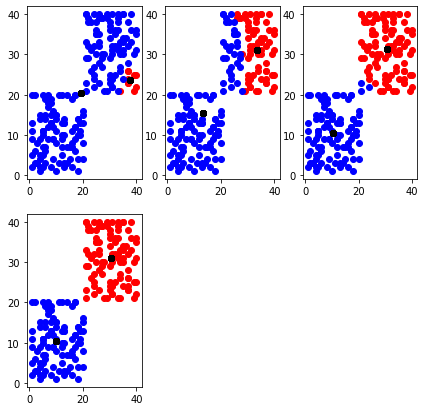

In [26]:
## Program description: Basic K-Means Clustering - Two Clusters ##
## Name of Author: Aditya Ranjan ##
## ----------------------------------------------------------------------------- ##


#Import Essential Libraries
import math
import matplotlib.cbook as cb
import matplotlib.pyplot as plt
import numpy as np
import warnings


#Sets the size of the figure
plt.rcParams["figure.figsize"] = (7, 7)


#Ignores Warnings
warnings.filterwarnings("ignore", category = cb.mplDeprecation)


#Creates Necessary Lists
xValues, yValues, cluster1, cluster2 = [], [], [], []


#Creates two clusters and adds all points to X values and Y values lists
for i in range(100):
  point1 = (np.random.randint(1, 21), np.random.randint(1, 21))
  point2 = (np.random.randint(21, 41), np.random.randint(21, 41))
  xValues.extend([point1[0], point2[0]])
  yValues.extend([point1[1], point2[1]])


#Calculates the distance between two points
def distance(pointOne, pointTwo):
  return ((((pointOne[0] - pointTwo[0]) ** 2) + ((pointOne[1] - pointTwo[1]) ** 2)) ** 0.5)


#Finds the average point of a cluster
def average(cluster):
  xSum, ySum = 0, 0
  for a in range(len(cluster)):
    xSum += cluster[a][0]
    ySum += cluster[a][1]
  return ([xSum / len(cluster), ySum / len(cluster)])


#Initially randomizes the center points
center1, center2 = (np.random.randint(1, 41), np.random.randint(1, 41)), (np.random.randint(1, 41), np.random.randint(1, 41))


#K-Means Clustering Algorithm

numDifferences = 1
iterationNum = 0

#Loop will stop when the algorithm converges
while numDifferences != 0:

  #Stores the previous iteration's clusters
  if iterationNum > 0:
    tempCluster1, tempCluster2 = [], []
    tempCluster1.extend(cluster1)
    tempCluster2.extend(cluster2)

  cluster1.clear()
  cluster2.clear()

  #Adds each point to a cluster based on the distance from each center point
  for j in range(len(xValues)):
    if distance(center1, (xValues[j], yValues[j])) < distance(center2, (xValues[j], yValues[j])):
      cluster1.append((xValues[j], yValues[j]))
    elif distance(center2, (xValues[j], yValues[j])) < distance(center1, (xValues[j], yValues[j])):
      cluster2.append((xValues[j], yValues[j]))
    else:
      randNum = np.random.randint(1, 3)
      if randNum == 1:
        cluster1.append((xValues[j], yValues[j]))
      else:
        cluster2.append((xValues[j], yValues[j]))

  #Calculates how many points are different between the current cluster and the previous iteration's cluster
  if iterationNum > 0:
    numDifferences = len(list(set(tempCluster1) ^ set(cluster1)))

  #Breaks out of loop as soon as the algorithm converges
  if numDifferences == 0:
    break

  #Calculates new centers based on the average points of the clusters
  center1, center2 = average(cluster1), average(cluster2)

  #Plots both clusters and their respective centers
  for c in range(len(cluster1)):
    plt.subplot(2, 3, iterationNum + 1)
    plt.scatter(cluster1[c][0], cluster1[c][1], color = "red")
    plt.scatter(center1[0], center1[1], color = "black")
  for d in range(len(cluster2)):
    plt.subplot(2, 3, iterationNum + 1)
    plt.scatter(cluster2[d][0], cluster2[d][1], color = "blue")
    plt.scatter(center2[0], center2[1], color = "black")

  iterationNum += 1